In [242]:
import pickle
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
import numpy as np

In [243]:

data = pd.read_csv('C:\\Users\\baril\\OneDrive\\Desktop\\3395Compe\\train.csv', sep = ',', header=0).to_numpy()
data = pd.DataFrame(data = data[:,1:3], columns = ["Article", "Categorie"])
data = data[data['Categorie'].str.startswith('astro')]
data = data[data['Categorie'] != 'astro-ph.SR']
data = data.reset_index(drop=True)

In [244]:
data.head()

,Article,Categorie
0,The energy released in a solar flare is part...,astro-ph
1,"[Abridged] When WFC3 is installed on HST, th...",astro-ph
2,We forecast the impact of weak lensing (WL) ...,astro-ph.CO
3,"Using the OVRO, Nobeyama, and IRAM mm-arrays...",astro-ph
4,Although full interoperativity between theor...,astro-ph


In [245]:

data['Article_mod'] = data['Article'].str.replace("\r", " ")
data['Article_mod'] = data['Article_mod'].str.replace("\n", " ")
data['Article_mod'] = data['Article_mod'].str.replace("    ", " ")
data['Article_mod'] = data['Article_mod'].str.replace('"', '')
data['Article_mod'] = data['Article_mod'].str.lower()
punctuation_signs = list("?:!.,;_")

for punct_sign in punctuation_signs:
    data['Article_mod'] = data['Article_mod'].str.replace(punct_sign, '')
data['Article_mod'] = data['Article_mod'].str.replace("'s", "")
data['Article'] = data['Article'].str.replace('\d+', '')

In [246]:
data.head()

,Article,Categorie,Article_mod
0,The energy released in a solar flare is part...,astro-ph,the energy released in a solar flare is part...
1,"[Abridged] When WFC is installed on HST, the...",astro-ph,[abridged] when wfc3 is installed on hst the...
2,We forecast the impact of weak lensing (WL) ...,astro-ph.CO,we forecast the impact of weak lensing (wl) ...
3,"Using the OVRO, Nobeyama, and IRAM mm-arrays...",astro-ph,using the ovro nobeyama and iram mm-arrays w...
4,Although full interoperativity between theor...,astro-ph,although full interoperativity between theor...


In [247]:
nltk.download('punkt')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
n_obs = len(data)
word_bag_list = [] #tous les sacs du DF


[nltk_data] Downloading package punkt to C:\Users\baril/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\baril/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [248]:
n_obs

1500

In [249]:
for ligne in range(n_obs):
    word_bag = [] #sac de mot par article
    
    texte= data.loc[ligne]['Article_mod']
    mots = texte.split(" ")
    for mot in mots:
        word_bag.append(lemmatizer.lemmatize(mot, pos="v"))
        
    text_split = " ".join(word_bag)
    
    word_bag_list.append(text_split)

data['Article_mod'] = word_bag_list

In [250]:
nltk.download('stopwords')

no_word = list(stopwords.words('english'))

for mot in no_word:
    reg = r"\b" + mot + r"\b"
    data['Article_mod'] = data['Article_mod'].str.replace(reg, '')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\baril/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [251]:
list_columns = ["Categorie", "Article", "Article_mod"]
data = data[list_columns]
np.unique(data.Categorie)
categorie_codes = {
    'astro-ph': 0,
    'astro-ph.CO': 1,
    'astro-ph.GA': 2}
data['Categorie_Codes'] = data['Categorie']
data = data.replace({'Categorie_Codes':categorie_codes})
data.head()

,Categorie,Article,Article_mod,Categorie_Codes
0,astro-ph,The energy released in a solar flare is part...,energy release solar flare partition th...,0
1,astro-ph,"[Abridged] When WFC is installed on HST, the...",[abridged] wfc3 instal hst community p...,0
2,astro-ph.CO,We forecast the impact of weak lensing (WL) ...,forecast impact weak lensing (wl) cluster...,1
3,astro-ph,"Using the OVRO, Nobeyama, and IRAM mm-arrays...",use ovro nobeyama iram mm-arrays search ...,0
4,astro-ph,Although full interoperativity between theor...,although full interoperativity theoretical ...,0


In [252]:
train_x, test_x, train_y, test_y = train_test_split(data['Article_mod'], 
                                                   data['Categorie_Codes'],
                                                   test_size=0.15,
                                                   random_state=11)  
#TFIDF
ngram_range = (1,1)
min_df = 1
max_df = 125
max_features = 10000

tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features, ##à jouer avec
                        norm='l2',
                        sublinear_tf=True)
                        
train_x = tfidf.fit_transform(train_x).toarray()
test_x = tfidf.transform(test_x).toarray()
tfidf.get_feature_names()

['00',
 '000',
 '00002',
 '000081',
 '0001',
 '00017',
 '0002',
 '00021',
 '00025',
 '0003',
 '00030',
 '000321',
 '00036',
 '0004',
 '0005',
 '00053',
 '00064',
 '0007',
 '00075',
 '0008',
 '00088',
 '001',
 '0010',
 '0011',
 '00118',
 '0012',
 '0013',
 '0014',
 '0016',
 '0017',
 '0018',
 '00188',
 '00189',
 '0018a',
 '001mjy',
 '002',
 '0020',
 '0022',
 '0023',
 '0024',
 '0025',
 '0025r',
 '0026',
 '0027',
 '0028',
 '0029',
 '003',
 '0030',
 '00301',
 '0033',
 '00346',
 '0035',
 '00358',
 '0036',
 '0037',
 '0038',
 '003mjy',
 '004',
 '00414',
 '0042',
 '004200',
 '0043',
 '0046',
 '0047',
 '004mjy',
 '005',
 '00513',
 '0054',
 '0055',
 '00585',
 '006',
 '0065',
 '0068',
 '007',
 '00700',
 '0072',
 '008',
 '009',
 '0090',
 '0094',
 '01',
 '010',
 '0100',
 '0101',
 '0104',
 '0109',
 '010mjy',
 '011',
 '0115',
 '011pm001',
 '012',
 '0121',
 '0125x10',
 '013',
 '0131',
 '014',
 '0142',
 '015',
 '0154',
 '015pm005',
 '016',
 '0167',
 '016x10',
 '017',
 '018',
 '019',
 '0198',
 '019pm004',

In [253]:
from sklearn import svm
from sklearn.metrics import accuracy_score
np.random.seed(42)

SVM = svm.SVC(kernel='rbf')
SVM.fit(train_x,train_y)

predictions_SVM = SVM.predict(test_x)
   
print("SVM Accuracy Score (Validation) -> ",accuracy_score(predictions_SVM, test_y)*100)
#predictions_SVM2 = SVM.predict(train_x)
#print("SVM Accuracy Score (Train) -> ",accuracy_score(predictions_SVM2, train_y)*100)



SVM Accuracy Score (Validation) ->  72.44444444444444


In [257]:
pred_i = SVM.predict(test_x[4])


ValueError: Expected 2D array, got 1D array instead:
array=[0. 0. 0. ... 0. 0. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

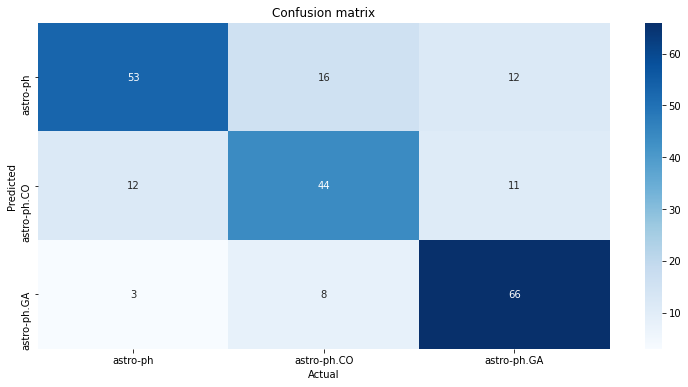

In [255]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
aux_df = data[['Categorie', 'Categorie_Codes']].drop_duplicates().sort_values('Categorie_Codes')
conf_matrix = confusion_matrix(test_y, predictions_SVM)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Categorie'].values, 
            yticklabels=aux_df['Categorie'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [256]:
import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

svc_0 =svm.SVC(random_state=8)
# C
C = [.0001, .001, .01]

# gamma
gamma = [.0001, .001, .01, .1, 1, 10, 100]

# degree
degree = [1, 2, 3, 4, 5]

# kernel
kernel = ['linear', 'rbf', 'poly']

# probability
probability = [True]

# Create the random grid
random_grid = {'C': C,
              'kernel': kernel,
              'gamma': gamma,
              'degree': degree,
              'probability': probability
             }
# First create the base model to tune
svc = svm.SVC(random_state=8)

# Definition of the random search
random_search = RandomizedSearchCV(estimator=svc,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   scoring='accuracy',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8)

# Fit the random search model
random_search.fit(train_x, train_y)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 

In [110]:
print("The best hyperparameters from Random Search are:")
print(random_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(random_search.best_score_)
# Create the parameter grid based on the results of random search 
C = [.0001, .001, .01, .1]
degree = [3, 4, 5]
gamma = [1, 10, 100]
probability = [True]

param_grid = [
  {'C': C, 'kernel':['linear'], 'probability':probability},
  {'C': C, 'kernel':['poly'], 'degree':degree, 'probability':probability},
  {'C': C, 'kernel':['rbf'], 'gamma':gamma, 'probability':probability}
]

# Create a base model
svc = svm.SVC(random_state=8)

# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=svc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(train_x, train_y)

The best hyperparameters from Random Search are:
{'probability': True, 'kernel': 'poly', 'gamma': 0.001, 'degree': 4, 'C': 0.01}

The mean accuracy of a model with these hyperparameters is:
0.34583333333333327
Fitting 3 folds for each of 28 candidates, totalling 84 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed:  9.5min finished


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
             estimator=SVC(random_state=8),
             param_grid=[{'C': [0.0001, 0.001, 0.01, 0.1], 'kernel': ['linear'],
                          'probability': [True]},
                         {'C': [0.0001, 0.001, 0.01, 0.1], 'degree': [3, 4, 5],
                          'kernel': ['poly'], 'probability': [True]},
                         {'C': [0.0001, 0.001, 0.01, 0.1],
                          'gamma': [1, 10, 100], 'kernel': ['rbf'],
                          'probability': [True]}],
             scoring='accuracy', verbose=1)

In [111]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)
best_svc = grid_search.best_estimator_

best_svc

The best hyperparameters from Grid Search are:
{'C': 0.1, 'kernel': 'linear', 'probability': True}

The mean accuracy of a model with these hyperparameters is:
0.4646464646464647


SVC(C=0.1, kernel='linear', probability=True, random_state=8)

In [ ]:
best_svc.fit(train_x, train_y)
svc_pred = best_svc.predict(test_x)
# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(train_y, best_svc.predict(train_x)))
# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(test_y, svc_pred))

In [ ]:
# Classification report
print("Classification report")
print(classification_report(test_y,svc_pred))

aux_df = data[['Categorie', 'Categorie_Codes']].drop_duplicates().sort_values('Categorie_Codes')
conf_matrix = confusion_matrix(test_y, svc_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()